In [ ]:
pip install ucimlrepo

# --- ***TASK 1 (Task 2 starts from page 52)***







# Step 1 : Importing Data

In [ ]:
import pandas as pd

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# Step 2 : Make the output variable binary

In [ ]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64

In [ ]:
# Number of incomes lower than 50K
y.value_counts()["<=50K"] + y.value_counts()["<=50K."]

37155

In [ ]:
# Number of incomes lower than 50K
y.value_counts()[">50K"] + y.value_counts()[">50K."]

11687

We will make modifications to make the response variable binary. We will create another response variable  "income>50", with values "yes" if incomes are greater than 50K and "no" if not.

In [ ]:
y['income>50'] = y['income'].apply(lambda x: "no" if x == '<=50K' or x == '<=50K.' else "yes")
columns_to_drop = ['income']
y = y.drop(columns=columns_to_drop)
y.value_counts()

<ipython-input-7-0bff01296545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income>50'] = y['income'].apply(lambda x: "no" if x == '<=50K' or x == '<=50K.' else "yes")


income>50
no           37155
yes          11687
dtype: int64

# Step 3 : Data Treatment and analysis

## 1- NA treatments

There are some missing values (workclass, occupation and native-country). We will identify how to replace them or if we should keep them as NA.

### a) Workclass and occupation

In [ ]:
X['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
X['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
X[['occupation','workclass']][X['workclass']=='?'].value_counts()

occupation  workclass
?           ?            1836
dtype: int64

As we can see, all missing occupation values are also missing in workclass, so we can assume they are 100% correlated

In [ ]:
X[['age','workclass']][X['workclass']=='?'].value_counts()

age  workclass
20   ?            115
19   ?            113
18   ?             92
21   ?             89
22   ?             79
                 ... 
81   ?              6
82   ?              5
84   ?              2
83   ?              1
87   ?              1
Length: 70, dtype: int64

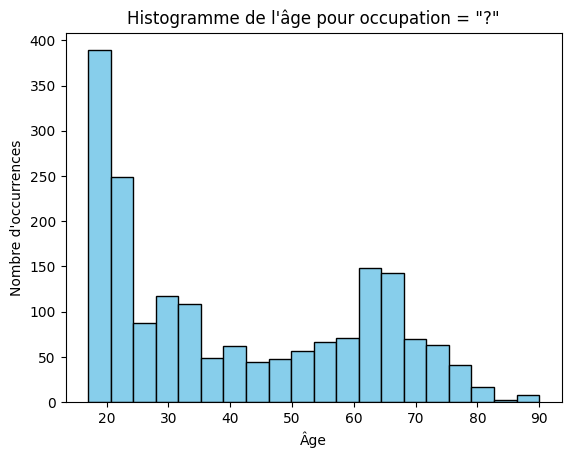

In [ ]:
# Identifying some correlation between occupation missing values and age

import pandas as pd
import matplotlib.pyplot as plt


data_missing_occupation = X[X['occupation'] == '?']


plt.hist(data_missing_occupation['age'], bins=20, color='skyblue', edgecolor='black')


plt.title('Histogramme de l\'âge pour occupation = "?"')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'occurrences')


plt.show()


It seems most of people that have missing values for the occupation feature are young and likely not working, or old enough to be retired. We can assume "?" can be represented as "No employment" so we will keep the NA values for both occupation and workclass.

### b) Native-country

In [ ]:
X['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
X['native-country'].value_counts()["United-States"]/sum(X['native-country'].value_counts())

0.9024872343930159

In [ ]:
(X['native-country'].value_counts()["United-States"]+X['native-country'].value_counts()["?"])/sum(X['native-country'].value_counts())

0.9144910228957338

We can see most of the native-country is "United-States". We will replace all the missing values by the most frequent one, because its only increasing the frequency of "United-States" by 1%.

In [ ]:
X['native-country'] = X['native-country'].replace('?', 'United-States')

<ipython-input-16-a19e87c51053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'] = X['native-country'].replace('?', 'United-States')


### c) Education and Education-num

In [ ]:
X[["education","education-num"]].value_counts()

education     education-num
HS-grad       9                15784
Some-college  10               10878
Bachelors     13                8025
Masters       14                2657
Assoc-voc     11                2061
11th          7                 1812
Assoc-acdm    12                1601
10th          6                 1389
7th-8th       4                  955
Prof-school   15                 834
9th           5                  756
12th          8                  657
Doctorate     16                 594
5th-6th       3                  509
1st-4th       2                  247
Preschool     1                   83
dtype: int64

We can see that education and education-num are 100% correlated. So we can drop one of them.

In [ ]:
X = X.drop(columns="education")
X

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


## 2- Correlation analysis

We are gonna identify the correlations between the different features and also the correlation with income output, to decide which features to keep or drop.

### a) Correlation between the categorical features

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Function in order to calculate the V's Cramer measure

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Correlation between all categorical variables
cramer_matrix = pd.DataFrame(index=["education-num", "marital-status", "relationship", "race", "sex", "workclass", "occupation", "native-country"], columns=["education-num", "marital-status", "relationship", "race", "sex", "workclass", "occupation", "native-country"])

for col1 in ["education-num", "marital-status", "relationship", "race", "sex", "workclass", "occupation", "native-country"]:
    for col2 in ["education-num", "marital-status", "relationship", "race", "sex", "workclass", "occupation", "native-country"]:
        cramer_matrix.loc[col1, col2] = cramers_v(X[col1], X[col2])

print("V Cramer Matrix :")
print(cramer_matrix)

V Cramer Matrix :
               education-num marital-status relationship      race       sex  \
education-num            1.0       0.089234     0.121423  0.070852  0.091589   
marital-status      0.089234            1.0     0.488059  0.082269  0.459324   
relationship        0.121423       0.488059          1.0  0.096989   0.64647   
race                0.070852       0.082269     0.096989       1.0   0.11361   
sex                 0.091589       0.459324      0.64647   0.11361  0.999954   
workclass             0.0966       0.081706     0.094951  0.057407  0.148909   
occupation          0.186551       0.129592     0.176016  0.077868  0.427453   
native-country      0.126396       0.057724     0.072953  0.402114  0.052698   

               workclass occupation native-country  
education-num     0.0966   0.186551       0.126396  
marital-status  0.081706   0.129592       0.057724  
relationship    0.094951   0.176016       0.072953  
race            0.057407   0.077868       0.40211

There appear to be different associations between variables. For example, the variable "relationship" is strongly associated with the "marital-status" (0.488059). Similarly, "sex" is strongly associated with "marital-status" (0.459324), "relationship" (0.64647) and "occupation" (0.427453). We should drop "sex" variable and "relationship".

### b) Correlation between the numerical features

In [ ]:
# Correlation between all numerical variables
matrice_corr = X[["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]].corr()

print("Correlation Matrix :\n", matrice_corr)

Correlation Matrix :
                      age    fnlwgt  capital-gain  capital-loss  hours-per-week
age             1.000000 -0.076628      0.077229      0.056944        0.071558
fnlwgt         -0.076628  1.000000     -0.003706     -0.004366       -0.013519
capital-gain    0.077229 -0.003706      1.000000     -0.031441        0.082157
capital-loss    0.056944 -0.004366     -0.031441      1.000000        0.054467
hours-per-week  0.071558 -0.013519      0.082157      0.054467        1.000000


We can see there is no correlation between numerical variables. So we can keep everyone of them.

### c) Correlation between categorical features and the responsive variable

In [ ]:
# Correlation between categorical features and the target value

cramer_matrix = pd.DataFrame(index=["education-num", "marital-status", "relationship", "race", "sex", "workclass", "occupation", "native-country"], columns=["income>50"])

for col1 in ["education-num", "marital-status", "relationship", "race", "sex", "workclass", "occupation", "native-country"]:
    for col2 in ["income>50"]:
        cramer_matrix.loc[col1, col2] = cramers_v(X[col1], y[col2])

print("V Cramer Matrix :")
print(cramer_matrix)

V Cramer Matrix :
               income>50
education-num   0.365452
marital-status   0.44817
relationship    0.454379
race            0.099447
sex             0.214532
workclass       0.173988
occupation      0.347294
native-country  0.092024


As we can see the race and native-country aren't really correlated with the target value, so we should drop it and be focused on the other ones. We can see there is a big and the same level of correlation for "marital-status" and "relationship" with the response variable. We should keep only one of them regarding the correlation between them and in order to avoid the redundancy in the information provided by these variables.

### d) Correlation between numerical features and the responsive variable

In [ ]:
# Correlation between numerical features and the target value

from scipy.stats import f_oneway

# Séparer les données en deux groupes basés sur la variable cible
data = pd.merge(X, y, left_index=True, right_index=True)
groupe_yes = data[data['income>50'] == 'yes']
groupe_no = data[data['income>50'] == 'no']

# Appliquer le test ANOVA pour chaque feature
for feature in ['age', 'fnlwgt', 'capital-gain','capital-loss','hours-per-week']:
    resultat_anova, p_value_anova = f_oneway(groupe_yes[feature], groupe_no[feature])
    print(f"ANOVA pour {feature}: F = {resultat_anova}, p-value = {p_value_anova}")

ANOVA pour age: F = 2737.207111901807, p-value = 0.0
ANOVA pour fnlwgt: F = 1.9625257410818864, p-value = 0.1612498059385631
ANOVA pour capital-gain: F = 2556.1790709041784, p-value = 0.0
ANOVA pour capital-loss: F = 1087.02756977735, p-value = 8.543599059076473e-236
ANOVA pour hours-per-week: F = 2670.3621236940835, p-value = 0.0


There is big correlation with most of variables except for fnlwgt which does not seem interesting for our prediction. Some charts are below to understand why there is no correlation.

(array([3.654e+03, 5.693e+03, 1.789e+03, 4.260e+02, 9.200e+01, 1.700e+01,
        1.100e+01, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([  13769. ,  135050.4,  256331.8,  377613.2,  498894.6,  620176. ,
         741457.4,  862738.8,  984020.2, 1105301.6, 1226583. ]),
 <BarContainer object of 10 artists>)

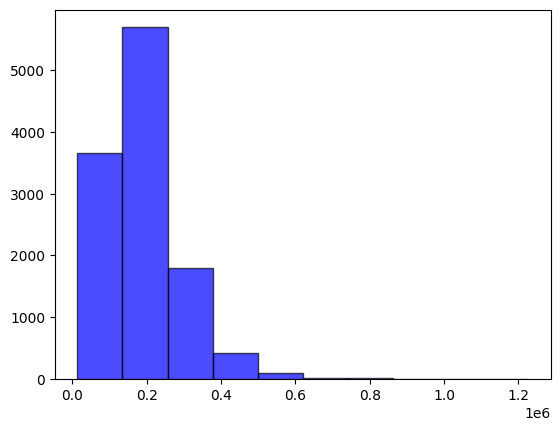

In [ ]:
# fnlwgt distribution with Income greater than 50K

df_filtered = data[data['income>50'] == 'yes']

plt.hist(df_filtered['fnlwgt'], bins=10, color='blue', alpha=0.7, edgecolor='black')


(array([1.5107e+04, 1.7410e+04, 3.9270e+03, 5.3900e+02, 1.2100e+02,
        2.7000e+01, 1.2000e+01, 6.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([  12285. ,  160096.5,  307908. ,  455719.5,  603531. ,  751342.5,
         899154. , 1046965.5, 1194777. , 1342588.5, 1490400. ]),
 <BarContainer object of 10 artists>)

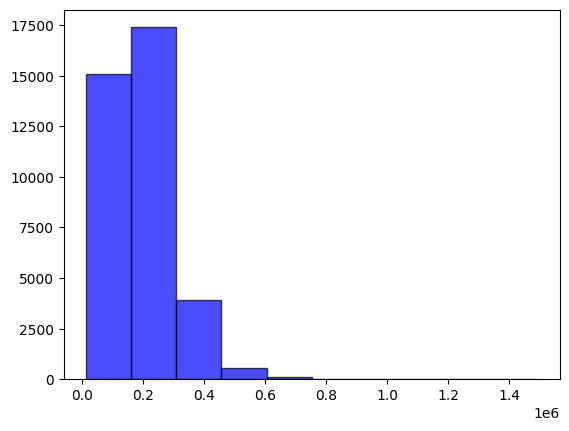

In [ ]:
# fnlwgt distribution with Income lower than 50K

df_filtered = data[data['income>50'] == 'no']

plt.hist(df_filtered['fnlwgt'], bins=10, color='blue', alpha=0.7, edgecolor='black')

We can see the distribution is looking the same either it's yes or no for this feature, so there is no correlation between income>50 and fnlwgt.

(array([ 254., 1600., 2747., 2946., 2175., 1255.,  503.,  148.,   41.,
          18.]),
 array([19. , 26.1, 33.2, 40.3, 47.4, 54.5, 61.6, 68.7, 75.8, 82.9, 90. ]),
 <BarContainer object of 10 artists>)

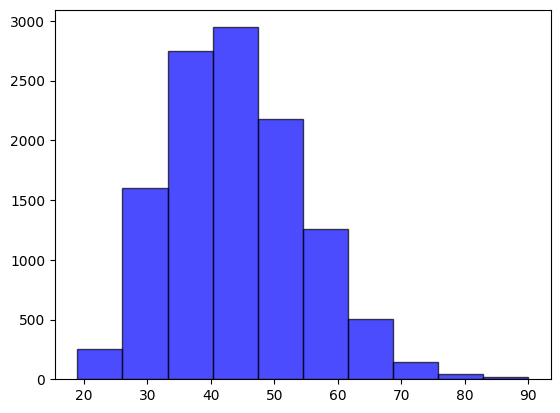

In [ ]:
# age distribution with Income greater than 50K

df_filtered = data[data['income>50'] == 'yes']

# Créer un histogramme
plt.hist(df_filtered['age'], bins=10, color='blue', alpha=0.7, edgecolor='black')


(array([8339., 7511., 6604., 5823., 3602., 2521., 1812.,  629.,  236.,
          78.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

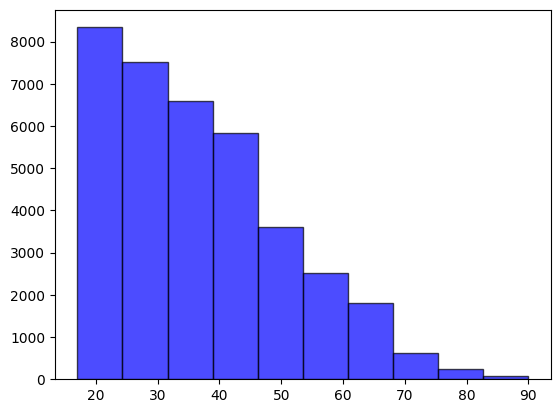

In [ ]:
# age distribution with Income lower than 50K

df_filtered = data[data['income>50'] == 'no']

plt.hist(df_filtered['age'], bins=10, color='blue', alpha=0.7, edgecolor='black')

The distribution shows there is some correlation between these age and income over $50k.

(array([10571.,   745.,   127.,     0.,     0.,     0.,     0.,     0.,
            0.,   244.]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

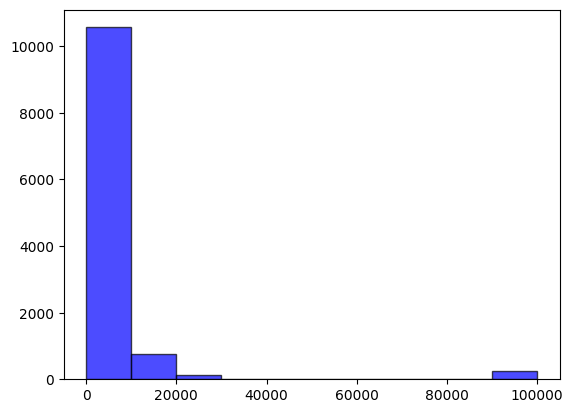

In [ ]:
# capital-gain distribution with Income greater than 50K

df_filtered = data[data['income>50'] == 'yes']

plt.hist(df_filtered['capital-gain'], bins=10, color='blue', alpha=0.7, edgecolor='black')

(array([3.6757e+04, 3.8000e+02, 8.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([    0.,  4131.,  8262., 12393., 16524., 20655., 24786., 28917.,
        33048., 37179., 41310.]),
 <BarContainer object of 10 artists>)

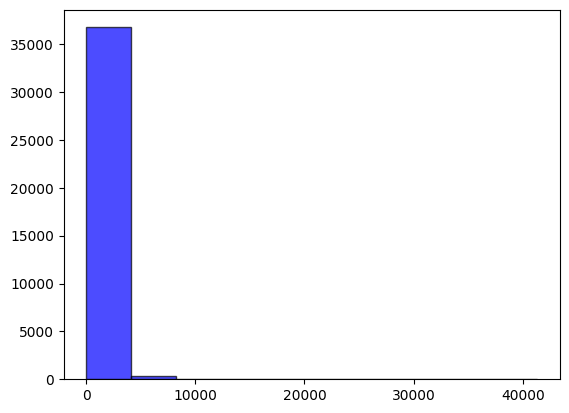

In [ ]:
# capital-gain distribution with Income lower than 50K

df_filtered = data[data['income>50'] == 'no']

plt.hist(df_filtered['capital-gain'], bins=10, color='blue', alpha=0.7, edgecolor='black')

Regarding the capital loss, we can undersand when this feature isn't equal to zero there is a very high of probability that the income are greater than 50k.

(array([1.0543e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00, 9.6000e+01,
        8.5100e+02, 1.7500e+02, 1.4000e+01, 5.0000e+00, 1.0000e+00]),
 array([   0. ,  368.3,  736.6, 1104.9, 1473.2, 1841.5, 2209.8, 2578.1,
        2946.4, 3314.7, 3683. ]),
 <BarContainer object of 10 artists>)

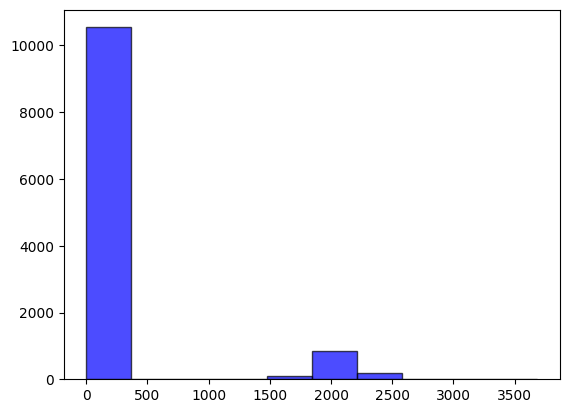

In [ ]:
# capital-loss distribution with Income greater than 50K

df_filtered = data[data['income>50'] == 'yes']

plt.hist(df_filtered['capital-loss'], bins=10, color='blue', alpha=0.7, edgecolor='black')

(array([3.6031e+04, 2.1000e+01, 2.9000e+01, 6.1700e+02, 3.1200e+02,
        1.3100e+02, 2.0000e+00, 2.0000e+00, 7.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

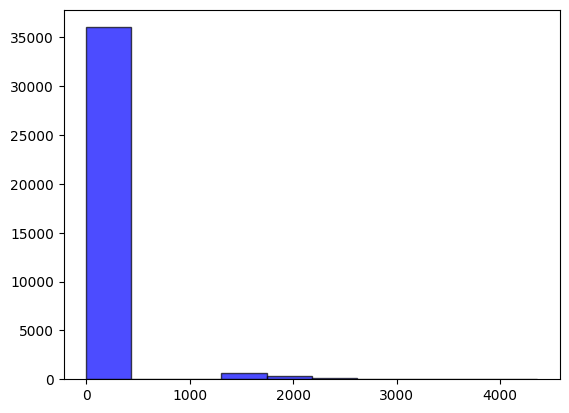

In [ ]:
# capital-loss distribution with Income lower than 50K

df_filtered = data[data['income>50'] == 'no']

plt.hist(df_filtered['capital-loss'], bins=10, color='blue', alpha=0.7, edgecolor='black')

We can see if the capital loss is greater than 2000, there is a high probability that the incomes are greater than 50k.

(array([ 105.,  196.,  225., 5419., 1618., 2571., 1131.,  239.,  118.,
          65.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

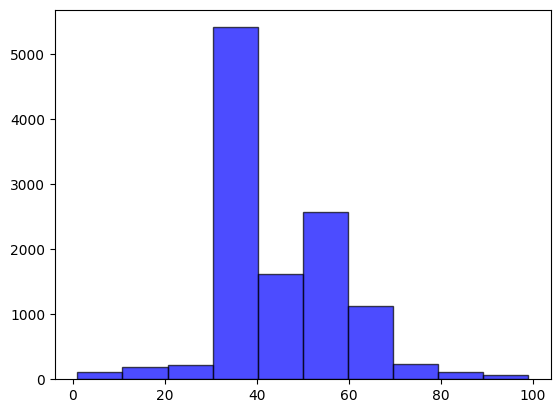

In [ ]:
# hours-per-week distribution with Income greater than 50K

df_filtered = data[data['income>50'] == 'yes']

plt.hist(df_filtered['hours-per-week'], bins=10, color='blue', alpha=0.7, edgecolor='black')

(array([ 1020.,  3132.,  3173., 21220.,  3053.,  3257.,  1511.,   444.,
          197.,   148.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

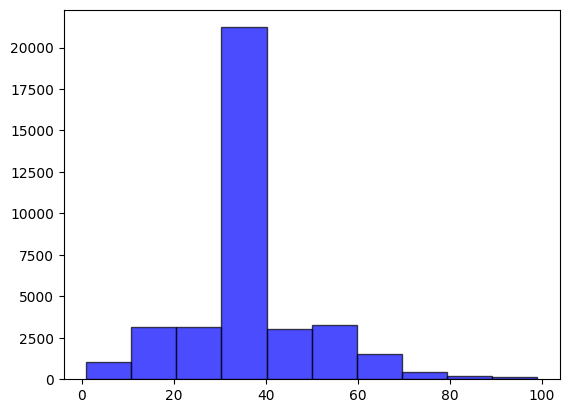

In [ ]:
# hours-per-week distribution with Income lower than 50K

df_filtered = data[data['income>50'] == 'no']

plt.hist(df_filtered['hours-per-week'], bins=10, color='blue', alpha=0.7, edgecolor='black')

We can see there is some differences on the distribution when the hours per week come greater than 40. So there is some correlation with the incomes.

To conclude, we will use the following features for predicting if the incomes are greater 50K :
"age", "capital-gain", "capital-loss", "hours-per-week", "education-num", "marital-status", "workclass","occupation"

In [ ]:
X = X[["age", "capital-gain", "capital-loss", "hours-per-week", "education-num", "marital-status", "workclass","occupation"]]
X

,age,capital-gain,capital-loss,hours-per-week,education-num,marital-status,workclass,occupation
0,39,2174,0,40,13,Never-married,State-gov,Adm-clerical
1,50,0,0,13,13,Married-civ-spouse,Self-emp-not-inc,Exec-managerial
2,38,0,0,40,9,Divorced,Private,Handlers-cleaners
3,53,0,0,40,7,Married-civ-spouse,Private,Handlers-cleaners
4,28,0,0,40,13,Married-civ-spouse,Private,Prof-specialty
...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,Divorced,Private,Prof-specialty
48838,64,0,0,40,9,Widowed,NaN,NaN
48839,38,0,0,50,13,Married-civ-spouse,Private,Prof-specialty
48840,44,5455,0,40,13,Divorced,Private,Adm-clerical


## 4-Classification of categorical variables

Assigning dummy variables

## a) marital-status



In [ ]:
X_dummy_ms = pd.get_dummies(X, columns=['marital-status'])
X_dummy_ms

,age,capital-gain,capital-loss,hours-per-week,education-num,workclass,occupation,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,39,2174,0,40,13,State-gov,Adm-clerical,0,0,0,0,1,0,0
1,50,0,0,13,13,Self-emp-not-inc,Exec-managerial,0,0,1,0,0,0,0
2,38,0,0,40,9,Private,Handlers-cleaners,1,0,0,0,0,0,0
3,53,0,0,40,7,Private,Handlers-cleaners,0,0,1,0,0,0,0
4,28,0,0,40,13,Private,Prof-specialty,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,Private,Prof-specialty,1,0,0,0,0,0,0
48838,64,0,0,40,9,NaN,NaN,0,0,0,0,0,0,1
48839,38,0,0,50,13,Private,Prof-specialty,0,0,1,0,0,0,0
48840,44,5455,0,40,13,Private,Adm-clerical,1,0,0,0,0,0,0


Isolating the correlation of marital-status, to see if all variables add value

In [ ]:
cramer_matrix = pd.DataFrame(index=["marital-status_Divorced", "marital-status_Married-AF-spouse", "marital-status_Married-civ-spouse", "marital-status_Married-spouse-absent", "marital-status_Never-married", "marital-status_Separated", "marital-status_Widowed"], columns=["income>50"])

for col1 in ["marital-status_Divorced", "marital-status_Married-AF-spouse", "marital-status_Married-civ-spouse", "marital-status_Married-spouse-absent", "marital-status_Never-married", "marital-status_Separated", "marital-status_Widowed"]:
    for col2 in ["income>50"]:
        cramer_matrix.loc[col1, col2] = cramers_v(X_dummy_ms[col1], y[col2])

print("V Cramer Matrix :")
print(cramer_matrix)

V Cramer Matrix :
                                     income>50
marital-status_Divorced               0.128186
marital-status_Married-AF-spouse      0.006724
marital-status_Married-civ-spouse     0.445786
marital-status_Married-spouse-absent  0.038827
marital-status_Never-married          0.318702
marital-status_Separated              0.073307
marital-status_Widowed                0.064755


We see that Married-civ-spouse and Never-married have the highest correlations, so essentially there is correlation between being married or not. Given this insight, we can summarise the features to Married or Single.
*   Married = Married-AF-spouse, Married-civ-spouse
*   Single = Divorced, Never-married, Seperated, Widowed



In [ ]:
X['married'] = X['marital-status'].apply(lambda x: 0 if x in ('Divorced', 'Never-married', 'Separated', 'Widowed') else 1)

<ipython-input-36-2ee2e10822f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['married'] = X['marital-status'].apply(lambda x: 0 if x in ('Divorced', 'Never-married', 'Separated', 'Widowed') else 1)


In [ ]:
X[['marital-status', 'married']].groupby('married').value_counts()

married  marital-status       
0        Never-married            16117
         Divorced                  6633
         Separated                 1530
         Widowed                   1518
1        Married-civ-spouse       22379
         Married-spouse-absent      628
         Married-AF-spouse           37
dtype: int64

We can now drop the column marital-status

In [ ]:
X = X.drop(columns='marital-status')
X

,age,capital-gain,capital-loss,hours-per-week,education-num,workclass,occupation,married
0,39,2174,0,40,13,State-gov,Adm-clerical,0
1,50,0,0,13,13,Self-emp-not-inc,Exec-managerial,1
2,38,0,0,40,9,Private,Handlers-cleaners,0
3,53,0,0,40,7,Private,Handlers-cleaners,1
4,28,0,0,40,13,Private,Prof-specialty,1
...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,Private,Prof-specialty,0
48838,64,0,0,40,9,NaN,NaN,0
48839,38,0,0,50,13,Private,Prof-specialty,1
48840,44,5455,0,40,13,Private,Adm-clerical,0


## b) workclass

In [ ]:
X_dummy_wc = pd.get_dummies(X, columns=['workclass'])
X_dummy_wc

,age,capital-gain,capital-loss,hours-per-week,education-num,occupation,married,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,2174,0,40,13,Adm-clerical,0,0,0,0,0,0,0,0,1,0
1,50,0,0,13,13,Exec-managerial,1,0,0,0,0,0,0,1,0,0
2,38,0,0,40,9,Handlers-cleaners,0,0,0,0,0,1,0,0,0,0
3,53,0,0,40,7,Handlers-cleaners,1,0,0,0,0,1,0,0,0,0
4,28,0,0,40,13,Prof-specialty,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,Prof-specialty,0,0,0,0,0,1,0,0,0,0
48838,64,0,0,40,9,NaN,0,0,0,0,0,0,0,0,0,0
48839,38,0,0,50,13,Prof-specialty,1,0,0,0,0,1,0,0,0,0
48840,44,5455,0,40,13,Adm-clerical,0,0,0,0,0,1,0,0,0,0


In [ ]:
cramer_matrix = pd.DataFrame(index=[
    "workclass_?",
    "workclass_Federal-gov",
    "workclass_Local-gov",
    "workclass_Never-worked",
    "workclass_Private",
    "workclass_Self-emp-inc",
    "workclass_Self-emp-not-inc",
    "workclass_State-gov",
    "workclass_Without-pay"], columns=["income>50"])

for col1 in [
    "workclass_?",
    "workclass_Federal-gov",
    "workclass_Local-gov",
    "workclass_Never-worked",
    "workclass_Private",
    "workclass_Self-emp-inc",
    "workclass_Self-emp-not-inc",
    "workclass_State-gov",
    "workclass_Without-pay"]:
    for col2 in ["income>50"]:
        cramer_matrix.loc[col1, col2] = cramers_v(X_dummy_wc[col1], y[col2])

print("V Cramer Matrix :")
print(cramer_matrix)

V Cramer Matrix :
                           income>50
workclass_?                 0.062362
workclass_Federal-gov       0.061805
workclass_Local-gov         0.034181
workclass_Never-worked      0.004453
workclass_Private           0.075438
workclass_Self-emp-inc      0.139393
workclass_Self-emp-not-inc  0.026721
workclass_State-gov         0.012716
workclass_Without-pay         0.0037


Self-emp-inc, Private, ?, Federal-gov have some interesting correlation, so we will drop the other features and assume them as other

In [ ]:
X = X_dummy_wc.drop(columns=["workclass_Local-gov",	"workclass_Never-worked",	"workclass_Self-emp-not-inc", "workclass_State-gov",	"workclass_Without-pay"])
X

,age,capital-gain,capital-loss,hours-per-week,education-num,occupation,married,workclass_?,workclass_Federal-gov,workclass_Private,workclass_Self-emp-inc
0,39,2174,0,40,13,Adm-clerical,0,0,0,0,0
1,50,0,0,13,13,Exec-managerial,1,0,0,0,0
2,38,0,0,40,9,Handlers-cleaners,0,0,0,1,0
3,53,0,0,40,7,Handlers-cleaners,1,0,0,1,0
4,28,0,0,40,13,Prof-specialty,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,Prof-specialty,0,0,0,1,0
48838,64,0,0,40,9,NaN,0,0,0,0,0
48839,38,0,0,50,13,Prof-specialty,1,0,0,1,0
48840,44,5455,0,40,13,Adm-clerical,0,0,0,1,0


## c) occupation

In [ ]:
X_dummy_oc = pd.get_dummies(X, columns=['occupation'])
X_dummy_oc

,age,capital-gain,capital-loss,hours-per-week,education-num,married,workclass_?,workclass_Federal-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,39,2174,0,40,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,0,0,13,13,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,0,0,40,9,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,53,0,0,40,7,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,28,0,0,40,13,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
48838,64,0,0,40,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48839,38,0,0,50,13,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
48840,44,5455,0,40,13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cramer_matrix = pd.DataFrame(index=[
    'occupation_Prof-specialty',
    'occupation_Craft-repair',
    'occupation_Exec-managerial',
    'occupation_Adm-clerical',
    'occupation_Sales',
    'occupation_Other-service',
    'occupation_Machine-op-inspct',
    'occupation_Transport-moving',
    'occupation_Handlers-cleaners',
    'occupation_?',
    'occupation_Farming-fishing',
    'occupation_Tech-support',
    'occupation_Protective-serv',
    'occupation_Priv-house-serv',
    'occupation_Armed-Forces'
    ], columns=["income>50"])

for col1 in ['occupation_Prof-specialty',
    'occupation_Craft-repair',
    'occupation_Exec-managerial',
    'occupation_Adm-clerical',
    'occupation_Sales',
    'occupation_Other-service',
    'occupation_Machine-op-inspct',
    'occupation_Transport-moving',
    'occupation_Handlers-cleaners',
    'occupation_?',
    'occupation_Farming-fishing',
    'occupation_Tech-support',
    'occupation_Protective-serv',
    'occupation_Priv-house-serv',
    'occupation_Armed-Forces'
    ]:
    for col2 in ["income>50"]:
        cramer_matrix.loc[col1, col2] = cramers_v(X_dummy_oc[col1], y[col2])

print("V Cramer Matrix :")
print(cramer_matrix)

V Cramer Matrix :
                             income>50
occupation_Prof-specialty     0.188668
occupation_Craft-repair       0.010525
occupation_Exec-managerial    0.210819
occupation_Adm-clerical       0.086282
occupation_Sales              0.023469
occupation_Other-service       0.15511
occupation_Machine-op-inspct   0.06969
occupation_Transport-moving   0.017805
occupation_Handlers-cleaners  0.084951
occupation_?                  0.062671
occupation_Farming-fishing    0.050873
occupation_Tech-support       0.020312
occupation_Protective-serv    0.024284
occupation_Priv-house-serv    0.036908
occupation_Armed-Forces            0.0


Prof-speciality, Exec-managerial, Other service, Adm-clerical, Handlers-cleaners have some interesting correlation, so we will drop the other features and assume them as other

In [ ]:
X = X_dummy_oc.drop(columns=[
    'occupation_Craft-repair',
    'occupation_Sales',
    'occupation_Machine-op-inspct',
    'occupation_Transport-moving',
    'occupation_?',
    'occupation_Farming-fishing',
    'occupation_Tech-support',
    'occupation_Protective-serv',
    'occupation_Priv-house-serv',
    'occupation_Armed-Forces'])
X

,age,capital-gain,capital-loss,hours-per-week,education-num,married,workclass_?,workclass_Federal-gov,workclass_Private,workclass_Self-emp-inc,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Handlers-cleaners,occupation_Other-service,occupation_Prof-specialty
0,39,2174,0,40,13,0,0,0,0,0,1,0,0,0,0
1,50,0,0,13,13,1,0,0,0,0,0,1,0,0,0
2,38,0,0,40,9,0,0,0,1,0,0,0,1,0,0
3,53,0,0,40,7,1,0,0,1,0,0,0,1,0,0
4,28,0,0,40,13,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,0,0,36,13,0,0,0,1,0,0,0,0,0,1
48838,64,0,0,40,9,0,0,0,0,0,0,0,0,0,0
48839,38,0,0,50,13,1,0,0,1,0,0,0,0,0,1
48840,44,5455,0,40,13,0,0,0,1,0,1,0,0,0,0


# Step 4 - Business Setting

A car company is releasing a new model and wants to optimise Marketing strategies. They want to specifically target individuals with an income over $50K, whom they believe can afford their new model. Hence, they need a model to best predict their target customers based on data they received

# Step 5 - False positive and false negative

False positive (FP) - predicted someone to earn more than $50K when in fact they do not.
Consequences: costs wasted trying to acquire a customer when they are unlikely to be able to afford it

False negative (FN) - predicted someone does not earn more than $50K when in fact they do.
Consequences: missed potential sales to this target

We class the FN costs higher than the FP costs, because the revenue that could be made on the sale of the car outweighs the marketing costs on a single target. Also, it is possible that in the mistargeting of the people who do not earn over $50K, they could recommend the car to someone in their network

Cost ratio = FP / FN = 30 / 60 = 0.5

The ratio calculated is 0.5 of the cost of a FP error to the cost of a FN error, hence, the cost of a false negative is considered 2 times higher than a false positive.

This was calculated from research that an average customer acqusition cost in the automative industry is USD30 per head, which we use to determine the wasted cost of marketing from a FP. The average annual car lease spend on a salary of USD50k is USD3,000, and with an average marketing conversion rate of 2%, we determine the loss to revenue as USD60, which is the cost of a FN.


# Step 6 - Calculating the total cost associated with the prediction

# Training the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
y = (y == "no").astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 21,
    stratify = y
)

In [ ]:
# Converting DataFrames to NumPy arrays
X_train_np = X_train.values
y_train_np = y_train.values.ravel()

X_test_np = X_test.values
y_test_np = y_test.values.ravel()

# Creating and fitting the logistic regression model
mod_log = LogisticRegression(max_iter=5000)
mod_log.fit(X_train_np, y_train_np)

LogisticRegression(max_iter=5000)

In [ ]:
# Coefficients and Intercept
print("Coefficients:", mod_log.coef_)
print("Intercept:", mod_log.intercept_)

# Number of Iterations
print("Number of iterations:", mod_log.n_iter_)

# Model Scores
print("Score on the training set:", mod_log.score(X_train_np, y_train_np))
print("Score on the test set:", mod_log.score(X_test_np, y_test_np))

Coefficients: [[-2.82312746e-02 -3.32883720e-04 -6.80990324e-04 -2.65316465e-02
  -3.14353219e-01 -2.53378496e+00  8.29895302e-01 -8.42988864e-01
  -2.83476208e-01 -5.27182335e-01  3.13236479e-01 -6.40971606e-01
   1.04487386e+00  1.21539206e+00 -3.52981679e-01]]
Intercept: [8.98821648]
Number of iterations: [1758]
Score on the training set: 0.8467928281026061
Score on the test set: 0.8452876544052412


The model is performing well

In [ ]:
# Prediction Probabilities
print("Prediction probabilities on the test set:", mod_log.predict_proba(X_test_np))

# Class Predictions
print("Class predictions on the test set:", mod_log.predict(X_test_np))

Prediction probabilities on the test set: [[0.01252766 0.98747234]
 [0.00530773 0.99469227]
 [0.03926012 0.96073988]
 ...
 [0.01630296 0.98369704]
 [0.09823692 0.90176308]
 [0.00529035 0.99470965]]
Class predictions on the test set: [1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Classification Report and Confusion Matrix
y_pred = mod_log.predict(X_test_np)

print("Classification report:\n", classification_report(y_test_np, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test_np, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      3506
           1       0.87      0.93      0.90     11147

    accuracy                           0.85     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.84      0.85      0.84     14653

Confusion matrix:
 [[ 2017  1489]
 [  778 10369]]


In [ ]:
TP = sum(y_pred[(y_test_np == 1)] == 1)
TN = sum(y_pred[(y_test_np == 0)] == 0)
FP = sum(y_pred[(y_test_np == 0)] == 1)
FN = sum(y_pred[(y_test_np == 1)] == 0)
print(
    TP,
    TN,
    FP,
    FN
)

10369 2017 1489 778


## Total cost function

In [ ]:
def calculate_cost(y_test, y_pred):
  FP = sum(y_pred[(y_test == 0)] == 1)
  FN = sum(y_pred[(y_test == 1)] == 0)
  cost = 60 * FN + 30 * FP
  return cost
calculate_cost(y_test_np, y_pred)

91350

Given the test data of 14,653 data points, the cost of having false negatives and false positives will incur a total cost of $91,350

# Converting to pdf

In [ ]:
!jupiter nbconvert --to html /content/MDB28_GP_22_Akinola_e237780_Hardouin_e237611.ipynb

/bin/bash: line 1: jupiter: command not found


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 libapache-pom-java libcommons-logging-java
  libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1
  libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby
  ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibu

In [ ]:
!jupyter nbconvert --to pdf /MDB28_GP_22_Akinola_e237780_Hardouin_e237611.ipynb

[NbConvertApp] WARNING | pattern '/MDB28_GP_22_Akinola_e237780_Hardouin_e237611.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyter

# --- ***TASK 2***

# Step 7: Define 100 candidate thresholds for turning probabilities into predictions

In [ ]:
import numpy as np

thresholds = np.linspace(0.01, 1, 100)

# Step 8: Create a matrix of size 100 (rows) by 10 (columns), with cells initialized with 0 values

In [ ]:
out = np.zeros((100,10))

# Step 9: Create a vector that randomly assigns each data point to one of the 10 CV folds

In [ ]:
n = np.ceil(len(y) / 10)
fold_vec = np.concatenate([np.arange(0, 10)] * int(n))
fold_vec = fold_vec[0:len(y)]
np.random.seed(1)
fold_vec = np.random.permutation(fold_vec)

In [ ]:
fold_vec

array([1, 9, 6, ..., 2, 2, 3])

# Step 10: Use logistic regression and perform a 10-fold CV

In [ ]:
for i in range(10):
  test_i = fold_vec == i
  train_i = fold_vec != i
  x_test = X.iloc[test_i,:]
  x_train = X.iloc[train_i,:]
  y_test = y.iloc[test_i]
  y_train = y.iloc[train_i]
  mod = LogisticRegression() # instantiate a classifier
  mod.fit(x_train, y_train) # train the classifier using the training set
  prob = mod.predict_proba(x_test) # get probabilities for the data in the validation set
  prob = prob[:,1] # retrieve the probabilities for Y=1
  for j in range(100):
    pred = (prob > thresholds[j]).astype(int) # use jth threshold to turn prob.s into predictions
    cost = calculate_cost(y_test.values.ravel(), pred) # calculate the prediction cost, using pred
    out [j,i] = cost # save cost in Row j, Column i of out

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

# Step 11: What is the best threshold and what is its associated cost?

In [ ]:
out_2 = np.mean(out, axis=1) # get the mean of the 10 CV flod
best_threshold = thresholds[out_2 == min(out_2)] # What is the best thresold regarding the cost (we want to minimize the cost)
print(best_threshold)
print(min(out_2))

[0.25]
29265.0


The best threshold is 0.25, with a cost of $29,265.

This is a significant reduction in the cost derived in Step 7, \$69,350, before performing 10-fold CV




# Step 12

The best thresold is not at the boundary (0.25), so we conclude the exercise.

# *Converting ipynb to pdf*

In [ ]:
!jupyter nbconvert --to pdf /MBD28_GP_2_Akinola_237780_Hardouin_237611.ipynb

[NbConvertApp] Converting notebook /MBD28_GP_2_Akinola_237780_Hardouin_237611.ipynb to pdf
[NbConvertApp] Support files will be in MBD28_GP_2_Akinola_237780_Hardouin_237611_files/
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files
[NbConvertApp] Making directory ./MBD28_GP_2_Akinola_237780_Hardouin_237611_files


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
